#                                      Machine Learning Modelling

### import necessary libraries

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

### Loading and Cleaning the dataset

In [47]:
df = pd.read_csv('Data Science Capstone Project (Responses).csv')

In [48]:
df.columns = df.columns.str.strip()

In [49]:
df.rename(columns={
    'On average, how many hours do you spend on screens after 10:00 PM?': 'ScreenTime',
    'Do you use night mode or a blue-light filter on your devices in the evening?': 'NightMode',
    'How often do you multitask on multiple screens (e.g., TV + phone) at night?': 'Multitasking'
}, inplace=True)

In [50]:
night_mode_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Always': 3}
multitask_map = {'Never': 0, 'Rarely': 1, 'Occasionally': 2, 'Always': 3}

In [51]:
df['NightModeScore'] = df['NightMode'].map(night_mode_map)
df['MultitaskScore'] = df['Multitasking'].map(multitask_map)

In [52]:
print("All Columns:\n")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {repr(col)}")

All Columns:

1. 'Timestamp'
2. 'Email Address'
3. 'Name'
4. 'Date of Birth'
5. 'Gender'
6. 'Field of Study'
7. 'At what time do you typically stop using screens (phone/laptop/TV) at night?'
8. 'ScreenTime'
9. 'NightMode'
10. 'Multitasking'
11. 'What is your primary screen activity at night?'
12. 'How long does it usually take you to fall asleep after turning off screens? (in minutes)'
13. 'On average, how many hours of sleep do you get on weekdays?'
14. 'How often do you wake up during the night?'
15. 'Do you feel well-rested after waking up in the morning?'
16. 'Do you use screens in bed before sleeping?'
17. 'Do you fall asleep while using a screen (e.g., phone, laptop, TV)?'
18. 'Do you wake up at night to check your phone or other devices?'
19. 'Is your room completely dark while sleeping?'
20. 'Do you follow a consistent sleep schedule (same sleep/wake time daily)?'
21. 'Do you consume caffeine (e.g., coffee, energy drinks) after 6 PM?'
22. 'How would you rate your overall experi

In [53]:
np.random.seed(42)
df['HealthScore'] = 10 - df['ScreenTime'] + (0.5 * df['NightModeScore']) - (0.7 * df['MultitaskScore']) + np.random.normal(0, 1, len(df))
df['HealthScore'] = df['HealthScore'].clip(lower=1, upper=10).round(1)

In [54]:
df_clean = df[['ScreenTime', 'NightModeScore', 'MultitaskScore', 'HealthScore']].dropna()

## LINEAR REGRESSION

In [55]:
X = df_clean[['ScreenTime', 'NightModeScore', 'MultitaskScore']]
y = df_clean['HealthScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [57]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 1.8734204607775466
R2 Score: 0.5781484066095435
Model Coefficients: [-0.84941845  0.54361319 -0.5220124 ]
Intercept: 9.252335423228295


In [58]:
def regression_plot(x, y, x_label, title):
    sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})
    plt.xlabel(x_label)
    plt.ylabel('Health Score')
    plt.title(title)
    plt.grid(True)
    plt.show()

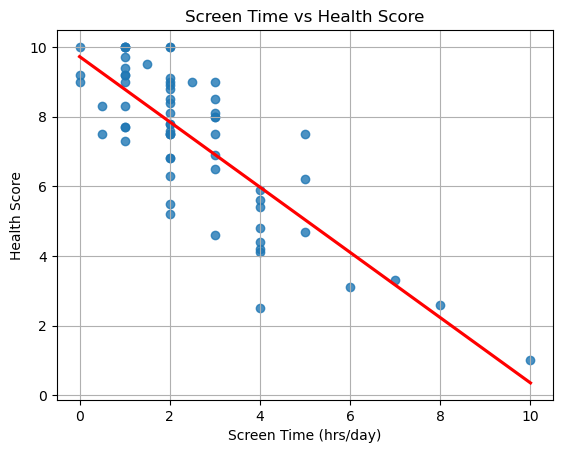

In [59]:
regression_plot(df_clean['ScreenTime'], df_clean['HealthScore'], 'Screen Time (hrs/day)', 'Screen Time vs Health Score')

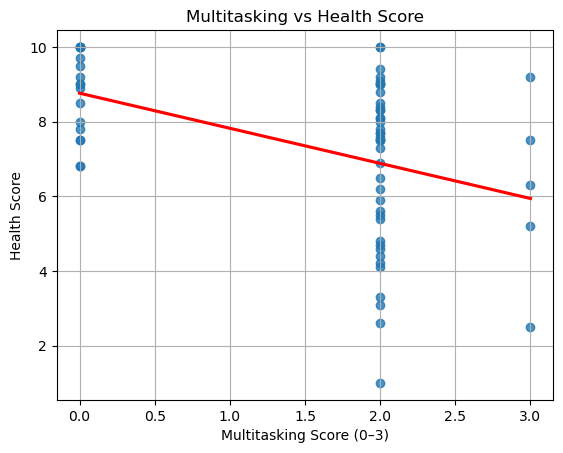

In [60]:
regression_plot(df_clean['MultitaskScore'], df_clean['HealthScore'], 'Multitasking Score (0–3)', 'Multitasking vs Health Score')

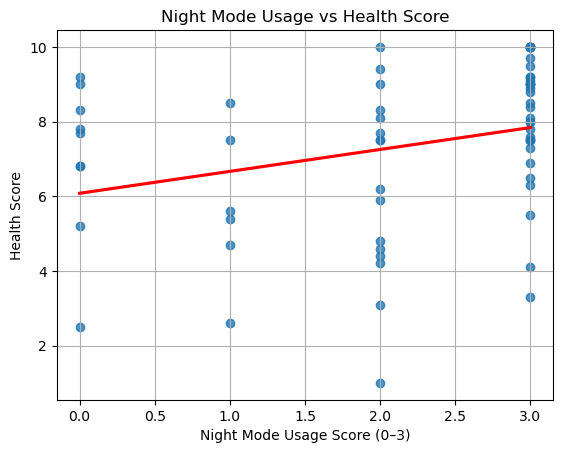

In [17]:
regression_plot(df_clean['NightModeScore'], df_clean['HealthScore'], 'Night Mode Usage Score (0–3)', 'Night Mode Usage vs Health Score')

### SVR AND RANDOM FOREST MODELS

In [71]:
df_cleaned = df.drop(columns=["Timestamp", "Email Address", "Name", "Date of Birth"])

In [72]:
df_cleaned["Poor Sleep"] = np.where(
    (df_cleaned["How long does it usually take you to fall asleep after turning off screens? (in minutes)"] > 30) |
    (df_cleaned["On average, how many hours of sleep do you get on weekdays?"] < 6.5) |
    (df_cleaned["How often do you wake up during the night?"].isin(["2–3 times", "More than 3 times"])) |
    (df_cleaned["Do you feel well-rested after waking up in the morning?"] == "Rarely"),
    1, 0
)


#### Selecting relevant columns

In [73]:
selected_columns = [
    'ScreenTime',
    'NightModeScore',
    'MultitaskScore',
    'How long does it usually take you to fall asleep after turning off screens? (in minutes)',
    'On average, how many hours of sleep do you get on weekdays?',
    'How often do you wake up during the night?',
    'Do you feel well-rested after waking up in the morning?'
]

In [75]:
df_model = df_cleaned[selected_columns + ['Poor Sleep']]

In [83]:
df_model

,ScreenTime,NightModeScore,MultitaskScore,How long does it usually take you to fall asleep after turning off screens? (in minutes),"On average, how many hours of sleep do you get on weekdays?",How often do you wake up during the night?,Do you feel well-rested after waking up in the morning?,Poor Sleep
0,4.0,1,2.0,10,7.0,More than 3 times,Often,1
1,1.0,1,NaN,30,12.0,Never,Often,0
2,5.0,1,2.0,20,7.0,Never,Always,0
3,3.0,2,2.0,30,8.0,Once,Often,0
4,2.0,0,0.0,10,6.0,Never,Always,1
...,...,...,...,...,...,...,...,...
80,2.0,0,NaN,2,11.0,Never,Often,0
81,3.0,2,NaN,30,8.0,Once,Sometimes,0
82,2.0,2,0.0,20,9.0,Once,Sometimes,0
83,1.0,1,NaN,1,8.0,Once,Sometimes,0


###  Encode categorical columns

In [84]:

df_encoded = df_model.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
df_encoded = df_encoded.fillna(df_encoded.median())

### Prepare features and target

In [85]:

X = df_encoded.drop(columns=["Poor Sleep"])
y = df_encoded["Poor Sleep"]



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

### Train models

In [106]:
rf_model = RandomForestClassifier(random_state=42)

### Support Vector Regression 

In [107]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR Mean Squared Error:", mse)
print("SVR R² Score:", r2)

SVR Mean Squared Error: 0.1559842028400062
SVR R² Score: 0.37606318863997523


In [108]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate models

In [95]:
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

In [109]:
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9090909090909091


In [98]:
print("Mean Squared Error:", mean_squared_error(y_test,  rf_model.predict(X_test)))
print("R2 Score:", r2_score(y_test, rf_model.predict(X_test)))

Mean Squared Error: 0.09090909090909091
R2 Score: 0.6363636363636364
